# Clusterização: K-Means - Grupos de Flores

## Importação das bibliotecas

In [1]:
# Pacotes de preparação dos dados
import numpy as np
import pandas as pd

# Pacotes gráficos
import matplotlib.pyplot as plt
import seaborn as sns

# Pacotes de modelagem
import sklearn
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

## Importação da base de dados

In [3]:
df_iris = pd.read_csv('iris.csv')
df_iris.head()

,comprimento_sepala,largura_sepala,comprimento_petala,largura_petala,Tipo_Orquidea
0,5.1,3.5,1.4,0.2,1
1,4.9,3.0,1.4,0.2,1
2,4.7,3.2,1.3,0.2,1
3,4.6,3.1,1.5,0.2,1
4,5.0,3.6,1.4,0.2,1


## Preparação dos Dados

### Missing Values

In [5]:
df_iris.isnull().sum()

comprimento_sepala    0
largura_sepala        0
comprimento_petala    0
largura_petala        0
Tipo_Orquidea         0
dtype: int64

### Duplicações

In [7]:
df_iris.duplicated().sum()

1

### Tipos de Variáveis

In [9]:
df_iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   comprimento_sepala  150 non-null    float64
 1   largura_sepala      150 non-null    float64
 2   comprimento_petala  150 non-null    float64
 3   largura_petala      150 non-null    float64
 4   Tipo_Orquidea       150 non-null    int64  
dtypes: float64(4), int64(1)
memory usage: 6.0 KB


## Análise Exploratória dos Dados

### Dispersão por Classe

C:\Users\FIC\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\FIC\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\FIC\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\FIC\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead

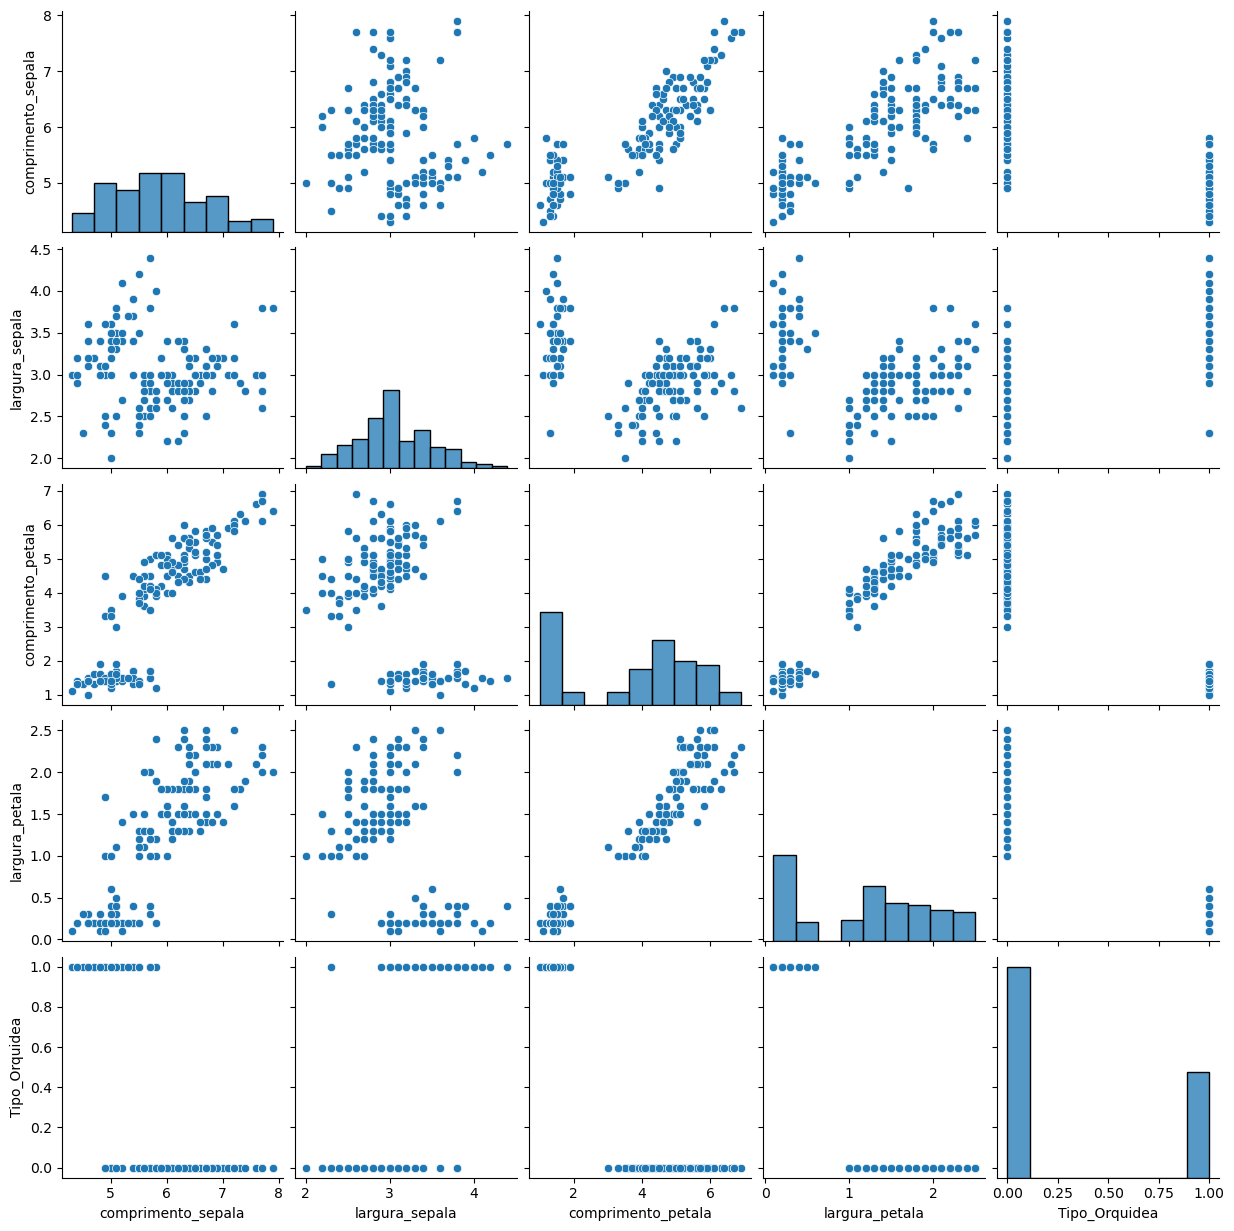

In [13]:
#sns.pairplot(df_iris, hue='Tipo_Orquidea')
sns.pairplot(df_iris)

## Desenvolvimento do Modelo: K-Means

### Padronização da Escala

In [15]:
# Seleção das variáveis
df_modelo = df_iris[['comprimento_petala',
                     'comprimento_sepala']].copy()

# Padronização da Escala
x_scaler = StandardScaler()
x_scaler.fit(df_modelo)

df_modelo_scaled = pd.DataFrame(x_scaler.transform(df_modelo),
                                index=df_modelo.index,
                                columns=df_modelo.columns)

In [17]:
df_modelo.describe()

,comprimento_petala,comprimento_sepala
count,150.000000,150.000000
mean,3.758000,5.843333
std,1.765298,0.828066
min,1.000000,4.300000
25%,1.600000,5.100000
50%,4.350000,5.800000
75%,5.100000,6.400000
max,6.900000,7.900000


In [19]:
df_modelo_scaled.describe()

,comprimento_petala,comprimento_sepala
count,1.500000e+02,1.500000e+02
mean,-4.263256e-16,-4.736952e-16
std,1.003350e+00,1.003350e+00
min,-1.567576e+00,-1.870024e+00
25%,-1.226552e+00,-9.006812e-01
50%,3.364776e-01,-5.250608e-02
75%,7.627583e-01,6.745011e-01
max,1.785832e+00,2.492019e+00


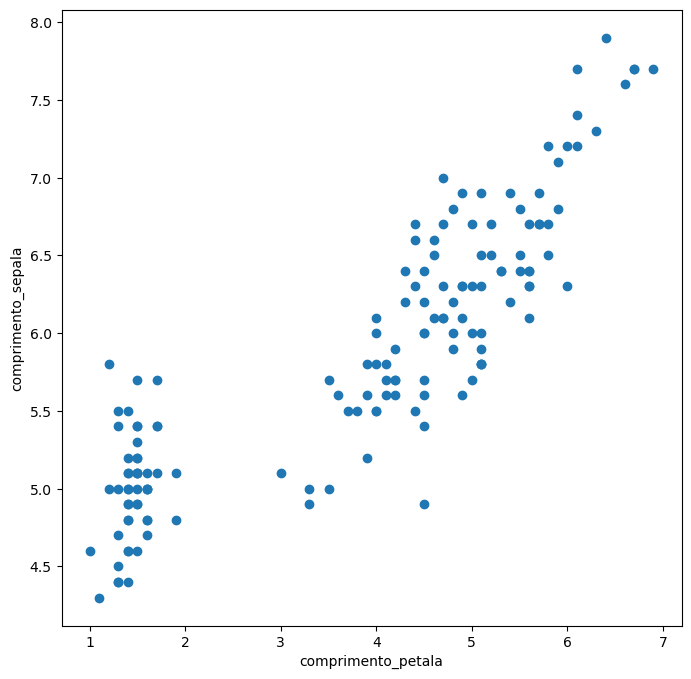

In [21]:
# Plotando comprimento_petala por largura_petala
fig = plt.figure(figsize=(8,8))
plt.scatter(df_modelo['comprimento_petala'],
            df_modelo['comprimento_sepala']);
plt.xlabel('comprimento_petala');
plt.ylabel('comprimento_sepala');

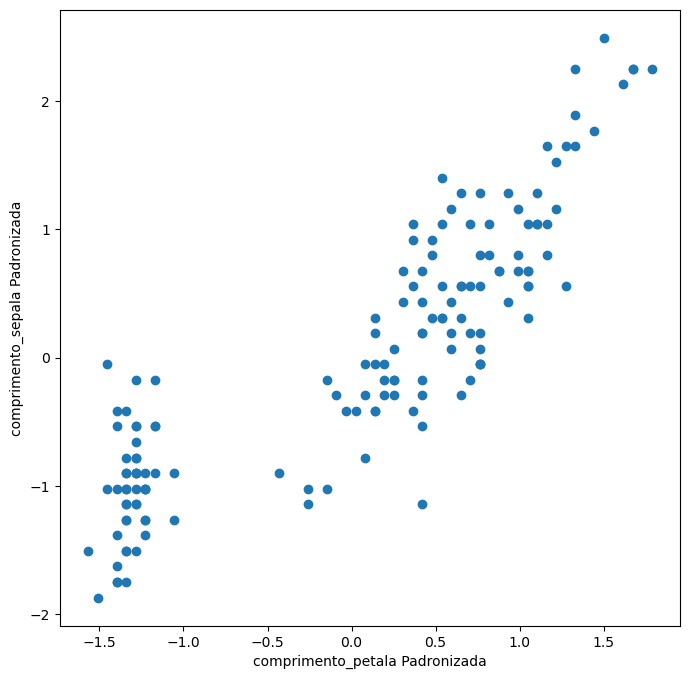

In [23]:
# Plotando comprimento_petala por largura_petala
# com escala padronizada
fig = plt.figure(figsize=(8,8))
plt.scatter(df_modelo_scaled['comprimento_petala'],
            df_modelo_scaled['comprimento_sepala']);
plt.xlabel('comprimento_petala Padronizada');
plt.ylabel('comprimento_sepala Padronizada');

### Treinamento do Modelo

In [25]:
modelo_km = KMeans(n_clusters=2, 
                   random_state=42)
modelo_km.fit(df_modelo_scaled)

C:\Users\FIC\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\FIC\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


KMeans(n_clusters=2, random_state=42)

### Análise dos clusters criados

In [27]:
cluster_predito = modelo_km.predict(df_modelo_scaled)
cluster_predito

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [29]:
modelo_km.cluster_centers_

array([[ 0.70047896,  0.60360505],
       [-1.17580397, -1.01319419]])

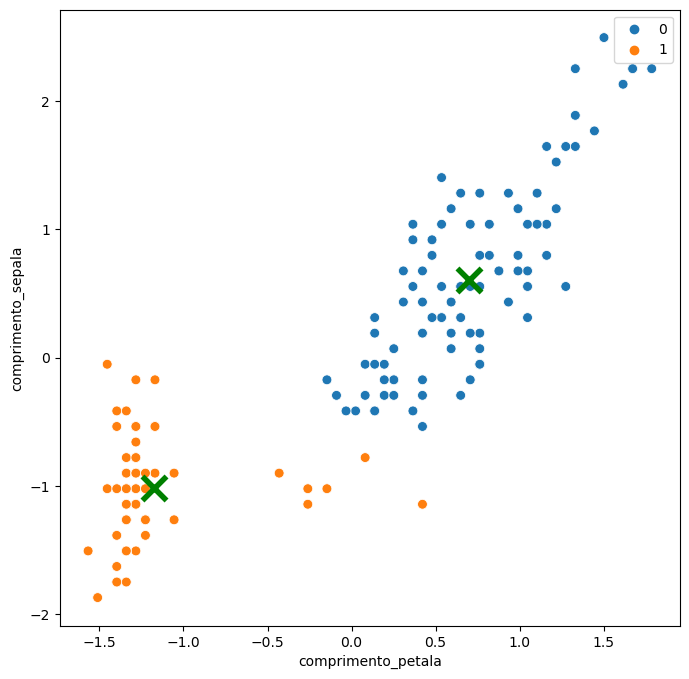

In [35]:
fig = plt.figure(figsize=(8,8))

# Plotando comprimento_petala por largura_petala
sns.scatterplot(x=df_modelo_scaled['comprimento_petala'],
                y=df_modelo_scaled['comprimento_sepala'],
                hue=cluster_predito, s=50)

# Marcando os centróides
sns.scatterplot(x=modelo_km.cluster_centers_[:,0],
                y=modelo_km.cluster_centers_[:,1], 
                marker='x', s=300, 
                linewidth=4, color='green', zorder=10);

### Cálculo da Inércia
A Inércia é a soma das distâncias entre cada observação e centróide do cluster ao qual ela pertence, ao quadrado.

In [37]:
modelo_km.inertia_

84.72073862193368

### Identificação do número de clusters

C:\Users\FIC\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\FIC\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\FIC\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\FIC\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment varia

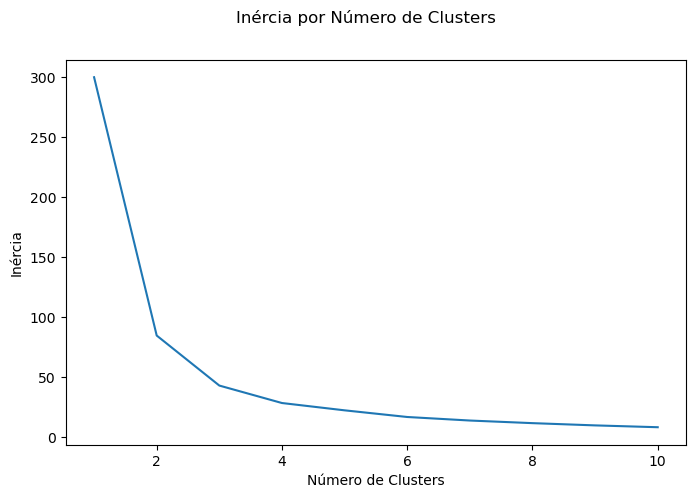

In [45]:
# Utilizando o Método do Cotovelo (Elbow-curve)
range_n_clusters = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
inercia = []

for num_clusters in range_n_clusters:
    kmeans = KMeans(n_clusters=num_clusters, max_iter=50)
    kmeans.fit(df_modelo_scaled)
    inercia.append(kmeans.inertia_)

fig = plt.figure(figsize=(8,5))
graf = sns.lineplot(x=range_n_clusters,
             y=inercia)
graf.figure.suptitle('Inércia por Número de Clusters');
graf.set_xlabel('Número de Clusters');
graf.set_ylabel('Inércia');

### Novo Modelo K-Means com 3 Clusters (K=3)

In [41]:
modelo_km3 = KMeans(n_clusters=3, 
                    random_state=42)

modelo_km3.fit(df_modelo_scaled)

C:\Users\FIC\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\FIC\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


KMeans(n_clusters=3, random_state=42)

### Análise dos novos clusters criados

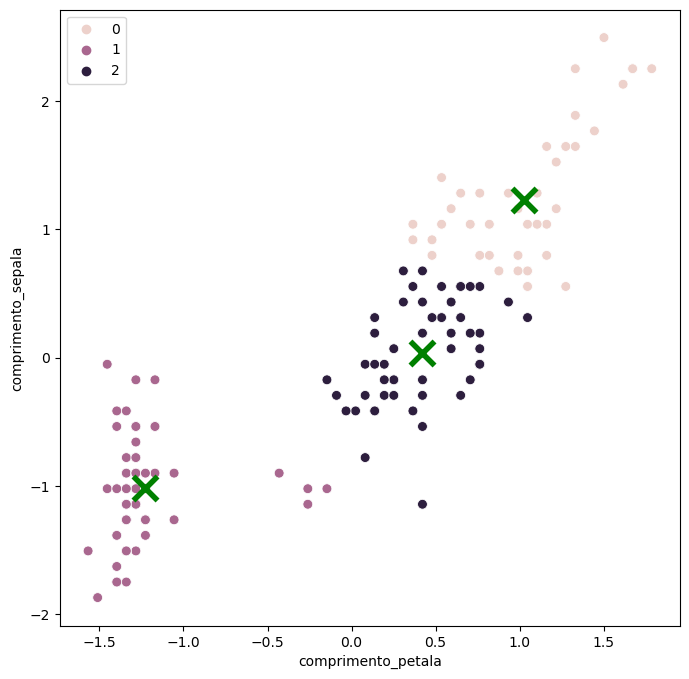

In [47]:
cluster_predito = modelo_km3.predict(df_modelo_scaled)

fig = plt.figure(figsize=(8,8))
# Plotando comprimento_sepala por comprimento_petala
sns.scatterplot(x=df_modelo_scaled['comprimento_petala'],
                y=df_modelo_scaled['comprimento_sepala'],
                hue=cluster_predito,
                s=50)

# Marcando os centróides
sns.scatterplot(x=modelo_km3.cluster_centers_[:,0],
                y=modelo_km3.cluster_centers_[:,1], 
                marker='x', s=300, 
                linewidth=4, color='green', zorder=10);

### Interpretação e Caracterização dos Clusters
**ATENÇÃO**: deve-se utilizar o método `predict` do modelo desenvolvido sobre o **DataFrame com as variáveis padronizadas** para identificar os clusters das observações no DataFrame original.

In [49]:
df_modelo['cluster'] = modelo_km3.predict(df_modelo_scaled)

In [51]:
df_modelo.groupby('cluster').describe().T

cluster                           0          1          2
comprimento_petala count  43.000000  54.000000  53.000000
                   mean    5.567442   1.596296   4.492453
                   std     0.629709   0.509888   0.483914
                   min     4.400000   1.000000   3.500000
                   25%     5.150000   1.400000   4.100000
                   50%     5.600000   1.500000   4.500000
                   75%     5.950000   1.600000   4.900000
                   max     6.900000   3.500000   5.600000
comprimento_sepala count  43.000000  54.000000  53.000000
                   mean    6.858140   5.005556   5.873585
                   std     0.446272   0.339487   0.324127
                   min     6.300000   4.300000   4.900000
                   25%     6.500000   4.800000   5.600000
                   50%     6.700000   5.000000   5.900000
                   75%     7.150000   5.175000   6.100000
                   max     7.900000   5.800000   6.400000

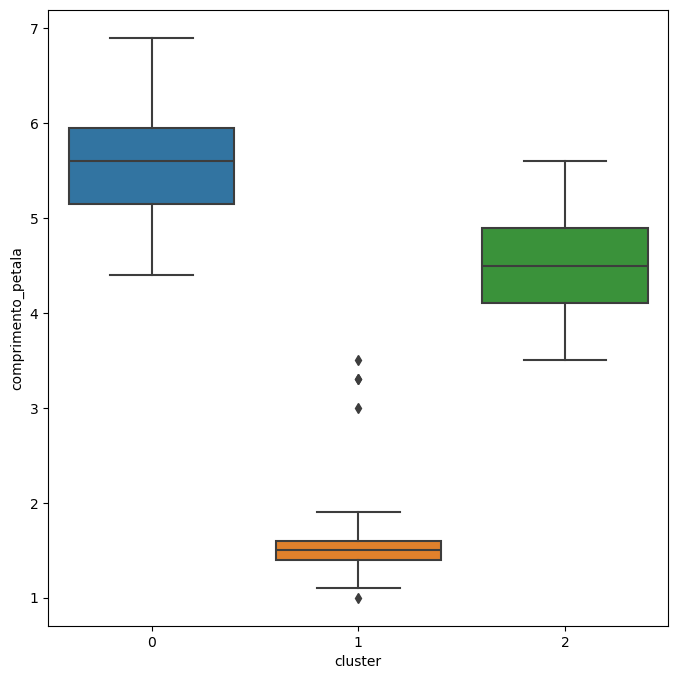

In [53]:
# Análise dos clusters em relação ao Comprimento da Pétala
fig = plt.figure(figsize=(8,8))
sns.boxplot(x='cluster',
            y='comprimento_petala', 
            data=df_modelo);

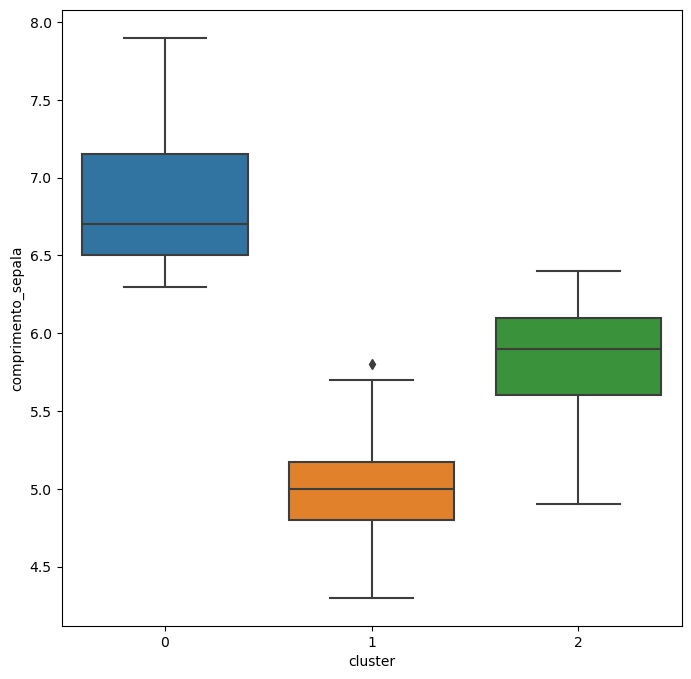

In [55]:
# Análise dos clusters em relação ao Comprimento da Sépala
fig = plt.figure(figsize=(8,8))
sns.boxplot(x='cluster',
            y='comprimento_sepala', 
            data=df_modelo);

### Opcional: Avaliação em relação a um *Target*
Em alguns casos, pode ser interessante desenvolver um modelo de cluster para construir grupos e avaliar esses grupos em relação a um *Target* que pode não estar disponível em todas as situações.

In [57]:
df_iris.head()

,comprimento_sepala,largura_sepala,comprimento_petala,largura_petala,Tipo_Orquidea
0,5.1,3.5,1.4,0.2,1
1,4.9,3.0,1.4,0.2,1
2,4.7,3.2,1.3,0.2,1
3,4.6,3.1,1.5,0.2,1
4,5.0,3.6,1.4,0.2,1


In [59]:
df_cluster_flor = pd.concat([df_modelo[['cluster']],
                             df_iris[['Tipo_Orquidea']]], 
                            axis=1)
df_cluster_flor.head()

,cluster,Tipo_Orquidea
0,1,1
1,1,1
2,1,1
3,1,1
4,1,1


In [61]:
df_cluster_flor.pivot_table(values='Tipo_Orquidea', 
                            index='cluster')

,Tipo_Orquidea
cluster,
0,0.000000
1,0.925926
2,0.000000
